# CMSC471 - Assignment 1: Uninformed Search

*Connor Ragan AN72374* 

## Overview and Learning Objectives

Uninformed Search (aka blind search) refers to the search strategies that do not use additional information about states and goal of the search - nothing beyond the provided problem definition. The first algorithms that we studied in Chapter 3 of the Russel & Norvig textbook were Breadth First Search (BFS) and Depth First Search (DFS) which both fall into the category of Uniformed Search.  In the first part of this assignment, you will implement both BFS and DFS algorithms in Python and then test them on a simple graph and grid.

We also studied how we can modify DFS to combine the advantages of BFS (completeness and conditional optimality) with the main advantage of DFS --space complexity of $O(bm)$ where $b$ is the branching factor and $m$ is the maximum depth of the search space. Limited Depth Search and Iterative Deepening DFS were two algorithms that we studied in that section and you are going to implement them in Part II of this assignment.

Pedagogically, this assignment will help you:
- better understand how these algorithms work in pratice. 
- brush up your Python skills - and possibly learn a couple of new "Pythonic" tricks!
- pratice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

# Part I - Breadth First Search (BFS) and Depth First Search (DFS)

## Required Code

In <b>Part I</b> of this Jupyter Notebook, you must implement the following functions:

  * `breadthFirstSearch(startState, goalState, successorsf)` 
  * `depthFirstSearch(startState, goalState, successorsf)`
  
Each receives as arguments the starting state, the goal state, and a successors function.  `breadthFirstSearch` returns the breadth-first solution path as a list of states starting with the `startState` and ending with the `goalState`.  `depthFirstSearch` returns the depth-first solution path.

The major difference between BFS and DFS is the order they visit/expand and goal-test the nodes. They use a different mechanism for storing the nodes in memory. As discussed in the lectures, sections 3.3.1, 3.4.1 and Figure 3.11 of the textbook, BFS uses a FIFO strategy with a queue data structure and DFS uses a LIFO strategy with a stack data structure to pop the unexpanded nodes. Both FIFO and LIFO can be easily implemented in Python with a similar "list" data structure.

Once you implemented the required fucntions, demonstrate each one running with a simple graph as shown in the following example, and with the grid example.  Test your code on other graphs, which <font color="green">MAY CONTAIN CYCLES.  <b>Grading will be based on the accuracy of your outputs from both the given search problem examples as well as tests that will be different from the graph and grid example shown here.</b></font>

To help you get started, you are given below the wrapper function definitions `breadthFirstSearch` and `depthFirstSearch` for BFS and DFS. They both use a general `uninformedSearch` function which you will implement in the following cells.

In [4]:
def breadthFirstSearch(startState, goalState, successorsf):
    """
    Breadth first search function returns a path from the starting state to the goal state
    using the Breadth First Search (BFS) algorithm. It calls the helper function 'uninformedSearch'.
    """
    return uninformedSearch(startState, goalState, successorsf, True)

In [5]:
def depthFirstSearch(startState, goalState, successorsf):
    """
    Depth first search function returns a path from the starting state to the goal state
    using the Depth First Search (DFS) algorithm. It calls the helper function 'uninformedSearch'.
    """
    return uninformedSearch(startState, goalState, successorsf, False)

### Uninformed Search <font color = red> Required Implementation!

Now, you implement the `uninformedSearch` function. Enter your codes in the blocks that start with `### START CODE HERE ###`.

In those lines, you should replace <font color=green><b>None</b></font> with your code wherever needed to make function properly.

<b>Hints:</b>

- A Pythonic way to check if a list is empty is that its name returns `False` if it's empty, and `True` if it's not empty, and this property can be used in conditional statements like `if` or loop conditions in `while`
- To check if an element is in a given list, you can use `in`, like this: `if element in list:`
- `list.pop()` function is used to pop the last element of a list.
- `list.insert(index, element)` is used to insert an element at a specified position of a list, like this: `list.insert(0, element)` which inserts element in position `0`
- To concatenate a list to the front or end of a given list we can use `+` operator, e.g.: `list1 + list2` adds `list1` to the front of `list2`, and `list2 + list1`, adds `list1` to the end of `list2`.


In [58]:
def uninformedSearch(startState, goalState, successorsf, breadthFirst):
    """
    Search helper function returns a path from the starting state to the goal state
    using either Breadth First Search (BFS) or Depth First Search (DFS).

    Args:
        startState:     The starting state
        goalState:      The goal state
        successorsf:    The function that returns the children of a state
        breadthFirst:   Boolean. True for BFS and False for DFS
    Returns:
        Returns the solution path from start state to goal state as a list. If none is
        found, then returns the string "Goal Not Found!"
    """
    # Create the empty expanded dictionary
    expanded = {}
    # Create the unexpanded list and insert the starting state which has no parents.
    # No change needed here. Do not replace None here! It represents the root's parent.
    unExpanded = [(startState, None)] 

    ### START CODE HERE ###
    # If the startState is the goalState
    if startState == goalState:
        # Return the startState in [] to be consistent with the desired output as list
        return [startState]

    # While the unExpanded list is not empty - if a list is not empty it returns True!
    while unExpanded:
        # Pop the last state in the unExpanded list
        state, parent = unExpanded.pop()
        # Assign the parent to the state in the expanded dictionary
        expanded[state] = parent    
    ### END CODE HERE ###

        # Get the children of the state; use succesorsf function. It's implemented below this cell.
        children = successorsf(state)
        # Remove from children the states that are already in expanded or unExpanded
        children = [child for child in children if child not in expanded and child not in [s for (s, _) in unExpanded]]

        ### START CODE HERE ###
        # If we have reached the goal state, i.e. if the goalState is in children
        if goalState in children:
            # Create the solution path with the state as the parent of the goalState
            solutionPath = [state, goalState]

            # While the parent exists, i.e. parent is True
            while parent:
                # Insert the parent into the solutionPath at position index 0. Use .insert() method
                solutionPath.insert(0, parent)
                # Set the next parent
                parent = expanded[parent]

            # Return the solution path
            return solutionPath
        ### END CODE HERE ###

        # Reverse sort the children list to maintain the original order. 
        children.sort(reverse=True)
        # Create the child parent list using the current state
        childParent = [(child, state) for child in children]

         ### START CODE HERE ###
        # If breadth first search
        if breadthFirst:
            # Insert the childParent list in the front of the unExpanded list using + operator - FIFO
            unExpanded = childParent + unExpanded
        # Else if depth first search
        else:
            # Append the childParent list to the end of the unExpanded list using + operator - LIFO
            unExpanded = unExpanded + childParent
         ### END CODE HERE ###

    # If the goal was not found, print this
    return "Goal Not Found!"

### Example Test

Now, let's test your BFS/DFS implementation on an example graph. But how do you represent a directed graph or tree in Python? Let's use a dictionary to specify all the successors of each node. We name this dictionary `successors`.

In [59]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

The successors graph is illustrated below.

<img src="img/A1-graph.png" align="left"/>

We need a function now to return the successors of each node. To implement `successorsf` function, we import [copy library](https://docs.python.org/3.7/library/copy.html). This helps to get the successors of each key in the dictionary by providing a shallow copy of the binding value to each node (key) such that one can change one copy without changing the other. For more information on getting copies and mutable object bindings in Python, read the documentation in the [copy library](https://docs.python.org/3.7/library/copy.html).

In [60]:
import copy

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [61]:
successorsf('e')

['k', 'l']

Now, let's try BFS/DFS with some example tests on this graph.

In [62]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))

Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']


## The correct output:

`Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']`

In [63]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']


## The correct output:

`Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']`

>What if no path exists?! Let's try!

In [64]:
print('Non-existent paths:')
print('path from b to d does not exist.', breadthFirstSearch('b', 'd', successorsf))
print('path from d to h does not exist.', depthFirstSearch('d', 'h', successorsf))

Non-existent paths:
path from b to d does not exist. Goal Not Found!
path from d to h does not exist. Goal Not Found!


## The correct output:

`Non-existent paths:
path from b to d does not exist. Goal Not Found!
path from d to h does not exist. Goal Not Found!`

If you could get the desired outputs, <font color=blue>congratulations!</font> You're almost done with Part I, but before you move on to Part II, I need you to answer a few questions. I also want you to test your BFS/DFS on a grid which is a fun example! First, read the following section on expanded nodes and answer the following questions.

## Expanded Nodes vs The Solution Path

- You may have noticed that your solution path consists of the nodes which are on the path from the start state to the goal state but not all epanded (visited) nodes are returned in the solution path, because not all of the expanded (visited) nodes are connected.

- Moreover, BFS is a conditionally optimal algorithm, i.e. it returns the optimal solution under the condition that was discussed in the lecture and page 82 of the textbook - if the path cost is a non-decreasing function of the depth of the node. But, in your implementation, how could you display all the nodes that each algorithm BFS or DFS expanded before finding the goal? 

- To return all expanded nodes, add `list(expanded)` to `return` in line 54, like this:

>`54 return solutionPath, list(expanded)`

Notice that since `expanded` is a dictionary, we are getting a list of the keys in `dict` by applying `list()` converter.

Now, let's rerun our tests, and check both the solution path and the expanded nodes for BFS & DFS for node 'a' as the start state to node 'i' as the goal. We also import `time` to check the running time of the algorithms. Notice how we do this.

In [65]:
import time
print('Breadth-first')
start_time = time.clock()
returned = breadthFirstSearch('a', 'i', successorsf)
print("Running time --- %s seconds ---" % (time.clock() - start_time))
print('path from a to i is {} and the expanded are {}'.format(returned[0], returned[1]))

Breadth-first
Running time --- 0.0001088000003619527 seconds ---
path from a to i is a and the expanded are c


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [66]:
print('Depth-first')
start_time = time.clock()
returned = depthFirstSearch('a', 'i', successorsf)
print("Running time --- %s seconds ---" % (time.clock() - start_time))
print('path from a to i is {} and the expanded nodes are {}'.format(returned[0], returned[1]))

Depth-first
Running time --- 0.00014590000000680448 seconds ---
path from a to i is a and the expanded nodes are c


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


## Part I Questions

- Copy your output (solution path and expanded nodes) of the two previous cells - BFS and DFS tests - in the cell below.
- Q1 - Compare the length of the solution path and the list of expanded nodes for BFS and DFS.
- Q2 - Compare the running time of BFS and DFS for this test. Run both cells 3 times and check if there is any slight difference between them.
- Q3 - The list of expanded nodes does not contain the goal itself. Why? 
><b>Hint:</b> Note that some implementations of these algorithms do not check (goeal-test) the children of the node (successors) every time a new node is being expanded. But, we go with the Russel & Norvig textbook way of doing this. See Figure 3.11 for BFS on page 82. Also note that the textbook uses different names for unexpanded and expanded lists, `frontier` and `explored` respectively.

<font color=red>Enter your answers and copy the output of the two previous cells in the following markdown cell.</font>

- Your outputs and answer to Part I questions goes here - below the lines:

========================================================

YOUR OUTPUTS:

`Breadth-first
Running time --- 0.00010879999990720535 seconds ---
path from a to i is ['a', 'c', 'i'] and the expanded are ['a', 'b', 'c']`

`Depth-first
Running time --- 0.0001488000002609624 seconds ---
path from a to i is ['a', 'c', 'i'] and the expanded nodes are ['a', 'b', 'e', 'k', 'z', 'l', 'f', 'g', 'm', 'c']`

========================================================

YOUR Answers:

- Q1 - BFS and DFS found the same path to the solution, but DFS required expanding several more nodes than BFS.

- Q2 - The difference in running time is slight, but BFS tends to finish faster than DFS. 

- Q3 - The goal node itself is added to the path once reached, it does not need to be expanded.

<b>Attention: </b>After you answered the questions, and before you proceed, <b>REMOVE</b> the expanded list `list(expanded)` from `return` in line 54, we no longer need it. If you don't remove it, the results of the following test will be incorrect!

Alright, before we move on to Part II, let's try your BFS/DFS on one more example test - a navigation problem around a grid of size 10 x 10. Rows and columns will be indexed from 0 to 9. This is fun! No implementation required for this test! But your implemented function should return the correct output.

The following function takes the input state and returns all possible states.

In [67]:
def gridSuccessors(state):
    row, col = state
    # successors will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append( (newr, newc) )
    return succs

In [68]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [69]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [70]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [71]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))

Breadth-first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


Breadth-first search path from (0, 0) to (9, 9):
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


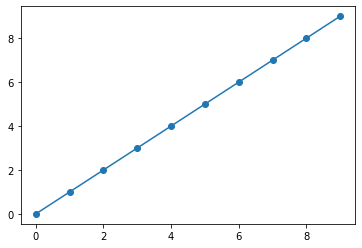

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Breadth-first search path from (0, 0) to (9, 9):')
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
print(path)
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

## The correct plot for BFS

<img src="img/grid-bfs.png" align="left"/>

> How about DFS?

In [73]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


Let's plot the paths.

In [74]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. To plot this path we must extract the first value in each tuple and put them in a list called `rows` to use as the $y$ coordinate of each point, and build a second list called `cols` of second values.

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

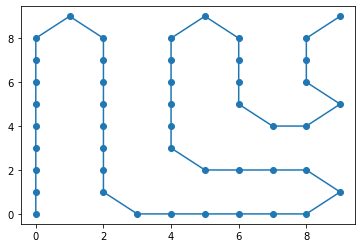

In [76]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

## The correct plot for DFS

<img src="img/grid-dfs.png" align="left"/>

> How about out-of-bound input?

In [77]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

'Goal Not Found!'

In [78]:
print('Non-existent paths:')
print('path from (5,5) to (10,10) is', breadthFirstSearch((5,5), (10,10), gridSuccessors))
print('path from (5,5) to (10,10) is', depthFirstSearch((5,5), (10,10), gridSuccessors))

Non-existent paths:
path from (5,5) to (10,10) is Goal Not Found!
path from (5,5) to (10,10) is Goal Not Found!


In [79]:
print('Same starting and goal states:')
print('path from (5,5) to (5,5) is', breadthFirstSearch((5,5), (5,5), gridSuccessors))
print('path from (5,5) to (5,5) is', depthFirstSearch((5,5), (5,5), gridSuccessors))

Same starting and goal states:
path from (5,5) to (5,5) is [(5, 5)]
path from (5,5) to (5,5) is [(5, 5)]


# Part II - Depth-Limited Search and Iterative Deepening DFS

## Required Code

In <b>Part II</b> of this Jupyter Notebook, you must implement the following functions:

* `iterativeDeepeningSearch(startState, goalState, actionsF, takeActionF, maxDepth)`
* `depthLimitedSearch(startState, goalState, actionsF, takeActionF, depthLimit)`

`depthLimitedSearch` is called by `iterativeDeepeningSearch` with `depthLimit`s of {$0, 1, \ldots, $ `maxDepth`}. Both must return either the solution path as a list of states, or the strings `cutoff` or `failure`.  `failure` indicates that all states were searched and the goal was not found. 

Each search function receives the following arguments:

  * the starting state, 
  * the goal state,
  * a function `actionsF` that is given a state and returns a list of valid actions from that state,
  * a function `takeActionF` that is given a state and an action and returns the new state that results from applying the action directly to the state,
  * either a `depthLimit` for `depthLimitedSearch`, or `maxDepth` for `iterativeDeepeningSearch`.

Once you implemented the required functions, use your solution to solve the 8-puzzle - Remember how I tried to [solve it online](http://www.tilepuzzles.com/default.asp?p=12) during the lecture? Now, Artificial Intelligence powered by YOUR intelligence will help solve this puzzle! 

The state of the puzzle are represented as a list of integers. 0 represents the empty position. 

Helper functions for the 8-puzzle are the following, and they are provided to you in the following cells. What you need to do for these helper functions is reading the code to make sure you understand what they do, and then implement the search algorithms.  These functions also have a more generalized version that can be used to solve more complicated puzzles like [15-puzzle](http://lorecioni.github.io/fifteen-puzzle-game/). Feel free to apply your algorithms and play with them once you finished your assignment!

  * `printState_8p(state)` prints the current state of the 8-puzzle.
  * `findBlank_8p(state)`: return the row and column index for the location of the blank (the 0 value).
  * `actionsF_8p(state)`: returns a list of up to four valid actions that can be applied in `state`. Return them in the order `left`, `right`, `up`, `down`, though only if each one is a valid action.
  * `takeActionF_8p(state, action)`: return the state that results from applying `action` in `state`.
  * `printPath_8p(startState, goalState, path)`: print a solution path in a readable form.  You may choose the format.

In [80]:
# Print the current state of the 8-puzzle
def printState_8p(currentState):
    # Call the print state helper function
    printState_Puzzle(currentState, 3, 3)

# Print the current state of a puzzle
def printState_Puzzle(currentState, rows, columns):
    # Counter for the index
    index = 0
    
    # For each row
    for row in range(rows):
        
        # For each column
        for column in range(columns):
            
            # If this is the blank, print a dash
            if currentState[index] == 0:
                print(' -', end=' ')
            else: # Else
                # Print the value at the current index
                # A width of 2 was used to accomodate the 15-puzzle double digits
                print('%2i' % currentState[index], end=' ')
                
            # Increment the index counter
            index += 1
            
        # Print a new line
        print()

> This is an example start state. We will use a simple list data structure to hold all of the values. The rows and columns will be handled by the code. The blank will be represented by a 0 digit.

In [81]:
startState = [1, 0, 3, 4, 2, 5, 6, 7, 8]

> Below is a sample output from the `printState` function. We pass in the state as an argument. It outputs the values of the tiles by row and column. The blank is printed as a dash for easier readability.

In [82]:
printState_8p(startState)

 1  -  3 
 4  2  5 
 6  7  8 


### Find Blank 8-Puzzle

The `findBlank_8p` wrapper function returns the location of the blank in an 8-puzzle. It calls the findBlank_Puzzle helper function using the current state and number of rows and columns in the puzzle. These were also designed to accommodate different sized puzzles. The **findBlank_Puzzle** function works similarly to the print state function above. It iterates through the rows and columns but instead returns the location of the blank when it's found.

In [83]:
# Find the location of the blank in an 8-puzzle
def findBlank_8p(currentState):
    # Call the find blank helper function and return the location
    return findBlank_Puzzle(currentState, 3, 3)

# Find the location of a blank in a puzzle
def findBlank_Puzzle(currentState, rows, columns):
    # Counter for the index
    index = 0
    
    # For each row
    for row in range(rows):
        
        # For each column
        for column in range(columns):
            
            # If this is the blank
            if currentState[index] == 0:
                # Return the location
                return (row, column)
            
            # Increment the index counter
            index += 1

Below is an output from our find blank function. Note that the return value is a tuple with index locations. The index is the row and the second is the column. So (0,1) represents the first row and second column, which corresponds to the blank in our example above.

In [84]:
findBlank_8p(startState)

(0, 1)

### Actions Function 8-Puzzle

The `actionsF_8p` wrapper function returns the valid actions for the current state of the 8-puzzle. It calls the helper function actionsF_Puzzle using the current state and the number of rows and columns. This was also designed to accommodate different sized puzzles. The `actionsF_Puzzle` function iterates through the rows and columns as the other functions above do. Once it finds the blank, it uses the current row and column to verify which actions are valid from that location. Then it returns the actions list.

In [85]:
# Returns the valid actions for the current state of the 8-puzzle
def actionsF_8p(currentState):
    # Call the helper function and return the value
    return actionsF_Puzzle(currentState, 3, 3)

# Returns the valid actions for the current state of a puzzle
def actionsF_Puzzle(currentState, rows, columns):
    # Counter for the index
    index = 0
    
    # For each row
    for row in range(rows):
        
        # For each column
        for column in range(columns):
            
            # If this is the blank
            if currentState[index] == 0:
                # Create the actions list
                actions = []
                
                # If the column is not at the far left, append left
                if column > 0:
                    actions.append("left")
                # If the column is not at the far right, append right
                if column < columns - 1:
                    actions.append("right")
                # If the row is not at the top, append up
                if row > 0:
                    actions.append("up")
                # If the row is not at the bottom, append down
                if row < rows - 1:
                    actions.append("down")
                    
                # Return the actions list
                return actions
            
            # Increment the index counter
            index += 1

Below is the output from the actions function. It takes in the start state and returns a list of all of the valid actions. Since the blank in the example above is at the top row, notice that the action 'up' is not returned in the list since that would not be a valid action.

In [86]:
actionsF_8p(startState)

['left', 'right', 'down']

### Take Action Function 8-Puzzle

The `takeActionF_8p` wrapper function below takes the action given on the input state for an 8-puzzle and returns the new state that the puzzle transitions to. It calls the takeActionF_Puzzle helper function. It was also designed to accommodate different sized puzzles. The `takeActionF_Puzzle` function begins by making a copy of the given state. The [`copy`](https://docs.python.org/3.7/library/copy.html) was needed so as not to modify the state that was passed in by reference. The function iterates through the rows and columns and locates the blank. When the blank is found, it performs the given action by "moving" the blank to the specified direction. It does this by swapping the values in the state list. Then the resulting new state is returned.

In [87]:
# Import the copy module
import copy

# Take the given action on the given state for an 8-puzzle and return the new state
def takeActionF_8p(currentState, action):
    # Call the take action helper function
    return takeActionF_Puzzle(currentState, action, 3, 3)

# Take the given action on the given state for a puzzle and return the new state
def takeActionF_Puzzle(currentState, action, rows, columns):
    # Create a copy of the currentState (needed so we don't modify the original)
    newState = copy.copy(currentState)
    
    # Counter for the index
    index = 0
    
    # For each row
    for row in range(rows):
        
        # For each column
        for column in range(columns):
            
            # If this is the blank
            if newState[index] == 0:
                
                # If action is left, then swap with left value
                if action == "left":
                    newState[index], newState[index-1] = newState[index-1], newState[index]
                # If action is right, then swap with right value
                elif action == "right":
                    newState[index], newState[index+1] = newState[index+1], newState[index]
                # If action is up, then swap with the value above
                elif action == "up":
                    newState[index], newState[index-columns] = newState[index-columns], newState[index]
                # If action is down, then swap with the value below
                elif action == "down":
                    newState[index], newState[index+columns] = newState[index+columns], newState[index]
                    
                # Return the new state
                return newState
            
            # Increment the index counter
            index += 1

The output for the `takeActionF_8p` function is shown below. Given our start state above and the action of 'down', the blank moves from the upper center position down to the middle center position. It essentially swaps position with the 2 below it.

In [88]:
takeActionF_8p(startState, 'down')

[1, 2, 3, 4, 0, 5, 6, 7, 8]

>A formatted version is below for easier readability.

In [89]:
printState_8p(takeActionF_8p(startState, 'down'))

 1  2  3 
 4  -  5 
 6  7  8 


>The sanity-check test below is just to demonstrate that the `takeActionF_8p` function returns a new state without changing/affecting the original input start state list. The outcome is tested by comparing two calls to the same function using the same start state.

In [90]:
goalState = takeActionF_8p(startState, 'down')

In [91]:
newState = takeActionF_8p(startState, 'down')

In [92]:
newState == goalState

True

### Depth Limited Search <font color = red> Required Implementation!

The **Depth Limited Search** performs a DFS algorithm but with a specified depth limit to resolve some of the issues with DFS such as getting stuck in a branch. It takes in as arguments the start state, goal state, the actions functions, and the depth limit. If the goal is found within the depth limit, then the path is returned. If we reach a cutoff, then a message is returned. If we fail to find the goal, then a failure message is returned. You will be using a recursive algorithm for this implementation. This allows you to use your depth-limited search in implementing your next algorithm iterative deepening DFS. Let's go!

In [96]:
# Performs a recursive depth limited search using a specified start state,
# goal state, actions functions, and depth limit. Either returns the path
# or it returns the string 'cutoff' or 'failure'.
def depthLimitedSearch(state, goalState, actionsF, takeActionF, depthLimit):
    
    ### START CODE HERE ###
    # If we have reached the goal state, i.e. state equals to goalState, then return an empty list
    if state == goalState:
        return []
    ### END CODE HERE ###
    
    # If we have reached the depth limit, then return "cutoff" 
    if depthLimit == 0:
        return "cutoff"
    
    # Create the cut off flag
    cutoffOccurred = False
    
    # Loop through each action for this state
    for action in actionsF(state):
        
        ### START CODE HERE ###
        # Take the current action and apply it to the current state using takeActionF
        childState = takeActionF(state, action)
        
        # Do a recursive call to depthLimitedSearch using the (childState, goalState, takeActionF, depthLimit-1)
        result = depthLimitedSearch(childState, goalState, actionsF, takeActionF, depthLimit-1)
        
        # If the recursive call (result) equals "cutoff", then set the cutoff flag (cutoffOccured) to True
        if result == "cutoff":
            cutoffOccurred = True
        # Else if the recursive call (result) doesn't equal "failure", 
        # then insert the childState into the result at position 0 using insert method
        elif result != "failure":
            result.insert(0, childState)
             # Return the result
            return result
        ### END CODE HERE ###
        
    # If a cutoff did occur, then return a cutoff string
    if cutoffOccurred:
        return "cutoff"
    # Otherwise, we have failed to find the goal. Return failure.
    else:
        return "failure"

To test this function, we can use the starting state and goal state below. Notice that an obvious solution would be to move the blank two spaces down. However, we will soon see that the returned solution from this algorithm isn't always the optimal solution.

<b>Note:</b> To keep the desired outputs as you follow and run the cells from this point on, you may make a copy of the notebook, or copy the cells so as not to lose the correct and desired outputs for your comparison.

In [97]:
startState = [1, 0, 3, 4, 2, 5, 6, 7, 8]
goalState = [1, 2, 3, 4, 7, 5, 6, 0, 8]
printState_8p(startState)
print()
printState_8p(goalState)

 1  -  3 
 4  2  5 
 6  7  8 

 1  2  3 
 4  7  5 
 6  -  8 


>If we pass in a depth of 1, the function should return a cutoff since the goal is not reachable in 1 step.

In [98]:
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 1)
path

'cutoff'

>If we pass in a depth of 2, the function is able to return the correct solution path of moving down two spaces.

In [99]:
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 2)
printState_8p(startState)
print()
printState_8p(path[0])
print()
printState_8p(path[1])

 1  -  3 
 4  2  5 
 6  7  8 

 1  2  3 
 4  -  5 
 6  7  8 

 1  2  3 
 4  7  5 
 6  -  8 


>However, notice when we pass in a depth greater than the optimal number of steps to the goal. The depth limited search takes a non-optimal path of moving the blank to the left and back to right again in the same spot before going down. The reason for this is because our algorithm generates the actions in the order of left, right, up, and down. Depth first search goes down deep before returning so unless we keep track of the previously visited states, it could take a path that leads to the same state again. In this case it went left and then right before descending down leading to a non-optimal solution.

In [100]:
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 4)
printState_8p(startState)
print()
printState_8p(path[0])
print()
printState_8p(path[1])
print()
printState_8p(path[2])
print()
printState_8p(path[3])

 1  -  3 
 4  2  5 
 6  7  8 

 -  1  3 
 4  2  5 
 6  7  8 

 1  -  3 
 4  2  5 
 6  7  8 

 1  2  3 
 4  -  5 
 6  7  8 

 1  2  3 
 4  7  5 
 6  -  8 


>If we continued to increase the depth, the algorithm would continue to cycle between left and right before taking the down path. We can attempt to solve this problem by using the iterative deepening search below.

In [101]:
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 6)
printState_8p(startState)
print()
printState_8p(path[0])
print()
printState_8p(path[1])
print()
printState_8p(path[2])
print()
printState_8p(path[3])
print()
printState_8p(path[4])
print()
printState_8p(path[5])

 1  -  3 
 4  2  5 
 6  7  8 

 -  1  3 
 4  2  5 
 6  7  8 

 1  -  3 
 4  2  5 
 6  7  8 

 -  1  3 
 4  2  5 
 6  7  8 

 1  -  3 
 4  2  5 
 6  7  8 

 1  2  3 
 4  -  5 
 6  7  8 

 1  2  3 
 4  7  5 
 6  -  8 


### Iterative Deepening DFS <font color = red> Required Implementation!

**Iterative Deepening Search** - as discussed in the lectures - is similar to limited-depth search but incrementally increases the depth limit until it finds the goal. It combines the benefits of DFS (lower space complexity) with the benefits of BFS (completeness and conditional optimality). It gradually increases the depth limit until the goal is found and returns the solution path. It takes in as arguments the start state, goal state, actions functions, and the max depth. It cycles through the depths and runs a depth limited search using the parameters. If the goal is found, the solution path is returned. We also insert the start state for completeness. If the goal is not found, then the depth limit is increased by one iteratively until either the goal is found or a failure is returned. And a cutoff is returned if we reach the max depth without reaching the goal - you can set the max threshold to avoid long runtimes.

In [102]:
# Performs an interative deepening search using the depth limited search function.
def iterativeDeepeningSearch(startState, goalState, actionsF, takeActionF, maxDepth):
    
    ### START CODE HERE ###
    # For each depth from 0 to maxDepth
    for depth in range(0, maxDepth):
        # Perform a depthLimitedSearch using (startState, goalState, actionsF, takeActionF, depth),
        # and record the result
        result = depthLimitedSearch(startState, goalState, actionsF, takeActionF, depth)
        
        # If we have failed to reach the goal, i.e. result equals "failure", then return "failure"
        if result == "failure":
            return "failure"
        
        # If we have not reached the "cutoff" using this depth, i.e. result does not equal "cutoff",
        # then insert the start state into the result and return the result (3 lines below)
        if result != "cutoff":
            result.insert(0,startState)       
            return result
     ### END CODE HERE ###
        
    # Return that we hit a cutoff
    return "cutoff"

>This `printPath_8p` helper function displays the start state, goal state, and path in a neat way that is easier to read. We will use this in a the following cells to display the results.

In [103]:
def printPath_8p(startState, goalState, path):
    print("Path from:")
    printState_8p(startState)
    print("to:")
    printState_8p(goalState)
    print("is", len(path), "nodes long", '\n')
    for p in path:
        printState_8p(p)
        print()

>A test of the function is shown below. With the max depth of 3, the function is able to find and return the correct solution path. Notice how `printPath_8p` helps.

In [104]:
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 3)
printPath_8p(startState, goalState, path)

Path from:
 1  -  3 
 4  2  5 
 6  7  8 
to:
 1  2  3 
 4  7  5 
 6  -  8 
is 3 nodes long 

 1  -  3 
 4  2  5 
 6  7  8 

 1  2  3 
 4  -  5 
 6  7  8 

 1  2  3 
 4  7  5 
 6  -  8 



>If we increase the max depth to large numbers like 1000, notice that the function continues to return the optimal solution. As mentioned above, this is due to the fact that the algorithm gradually tests each depth and returns when the first solution to the goal is found, and once the goal is found the algorithm stops.

In [105]:
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 1000)
printPath_8p(startState, goalState, path)

Path from:
 1  -  3 
 4  2  5 
 6  7  8 
to:
 1  2  3 
 4  7  5 
 6  -  8 
is 3 nodes long 

 1  -  3 
 4  2  5 
 6  7  8 

 1  2  3 
 4  -  5 
 6  7  8 

 1  2  3 
 4  7  5 
 6  -  8 



### Solvable and Unsolvable 8-Puzzle

There are cases in which the [8 puzzle is not solvable](https://www.cs.princeton.edu/courses/archive/fall12/cos226/assignments/8puzzle.html). For example, in the simple example below, switching the position of 1 and 2 makes it impossible to reach the goal state. It would seem that this could be done with a few simple slides, but our test below with iterative deepening set at max depth of 10 still cannot find a solution. In general, an odd number of inversions ([inverted number positions](https://www.geeksforgeeks.org/check-instance-8-puzzle-solvable/)) from the starting state in comparision to the goal state leads to an unsolvable puzzle.

In [106]:
startState = [2, 1, 3, 4, 5, 6, 7, 8, 0]
goalState = [1, 2, 3, 4, 5, 6, 7, 8, 0]
printState_8p(startState)
print()
printState_8p(goalState)
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 10)
path

 2  1  3 
 4  5  6 
 7  8  - 

 1  2  3 
 4  5  6 
 7  8  - 


'cutoff'

>One way to ensure that we have a solvable puzzle from the start is to start with the goal state and generate random valid actions on the state. An example function to generate a random start state was given to us and is shown below:

In [107]:
# Import the random module
import random

# This function generates a start state from the goal state using random valid actions
def randomStartState(goalState, actionsF, takeActionF, nSteps):
    state = goalState
    # Loop through the number of steps and take a random action
    
    for i in range(nSteps):
        state = takeActionF(state, random.choice(actionsF(state)))
        
    # Return the state
    return state

>To test this function, we start with a goal state below. Then we generate a reachable start state using a series of 10 random valid actions taken on the goal state. Then iterative deepening is used to find the solution back to the goal state. The results are shown below. Note that every time this is run, a different start state and solution will be generated.

In [108]:
goalState = [1, 2, 3, 4, 5, 6, 7, 8, 0]
startState = randomStartState(goalState, actionsF_8p, takeActionF_8p, 10)
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 20)
printPath_8p(startState, goalState, path)

Path from:
 -  2  3 
 1  4  6 
 7  5  8 
to:
 1  2  3 
 4  5  6 
 7  8  - 
is 5 nodes long 

 -  2  3 
 1  4  6 
 7  5  8 

 1  2  3 
 -  4  6 
 7  5  8 

 1  2  3 
 4  -  6 
 7  5  8 

 1  2  3 
 4  5  6 
 7  -  8 

 1  2  3 
 4  5  6 
 7  8  - 



<font color=blue>Congratulations! </font>You finished the first assignemtn of AI class! You learned and praticed a lot of things that we discussed in class. This is one of the cool features of Jupyter Notebooks, you can have all the contents, text, codes and plots in an interactive environment. We are going to have similar assignments for the following sections and chapters. Stay tuned! 

## Grading

For assignment 1, your notebook will be run and graded manually with a maximum of 100 points. Make sure that you get the desired outputs for all cells that you implemented. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I has 50 points:
- 20 points: correct outputs for BFS
- 20 points: correct outputs for DFS
- 10 points: correct answer of the Part I question

Part II has 40 points:
- 20 points: correct outputs for Depth Limited Search
- 20 points: correct outputs for Iterative Deepening DFS

The remaining 10 points will be based on your writing and formatting as instructed in the notebook.  Follow the instructions of each section carefully. Points will be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## References

- AI A Modern Approach - 3rd Edition - Russel & Norvig Textbook
- Professor Chuck Anderson's "Introduction to AI" notebooks, Colorado State University - special thanks to CS440 students (Kobayashi et al) for excellent documentation on some Python scripts
